# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#overview)
* [Stage 2. Data preprocessing](#preprocessing)
    * [2.1 Name & Genre](#name_gen)
    * [2.2 Year_of_release](#release)
    * [2.3 Critic_score](#critic)
    * [2.4 User_score](#user)
    * [2.5 Rating](#rating)
* [Stage 3. EDA](#eda)
    * [3.1 Calculate the total sales](#total_sales)
    * [3.2 Games released per year](#game_release)
    * [3.3 Sales per Platform](#platform_sales)
    * [3.4 The Longevity of Platforms](#platform_long)
    * [3.5 Seperate the relevant `year_of_release`](#seperate)
    * [3.6 Data Analysis](#da)
        * [3.6.1 General Sales](#da1)
        * [3.6.2 User & Critic Reviews](#da2)
        * [3.6.3 Genre](#da3)
    * [3.7 Data Analysis by Region](#da_r)
        * [3.7.1 NA](#na)
        * [3.7.2 EU](#eu)
        * [3.7.3 JP](#jp)
* [Stage 4. Hypotheses testing](#hypo)
     * [4.1 Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.](#hypo1)
     * [4.2 Hypothesis 2: Average user ratings for the Action and Sports genres are different.](#hypo2)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

**Which game sells the best in 2016?**

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 

## Stage 1. Data overview<a id='overview'></a>

In [1]:
# Loading libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns

In [2]:
# Load data files

df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Check for duplicates

df.duplicated().sum()

0

## Stage 2. Data preprocessing<a id='preprocessing'></a>

Things to fix based on observation:

1. Changing column names to lower cases
2. Fix missing values in column 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating
3. Changing the 'Year_of_Release' to datetime
4. Fix 'User_Score' type from object to float

In [6]:
# Change column names to lower cases

new_col_names = {
    'Name':'name',
    'Platform':'platform', 
    'Year_of_Release': 'year_of_release', 
    'Genre':'genre', 
    'NA_sales':'na_sales', 
    'EU_sales':'eu_sales', 
    'JP_sales':'jp_sales', 
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score', 
    'User_Score':'user_score', 
    'Rating': 'rating'
}
df.rename(columns = new_col_names, inplace= True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Definition of each column:**

1. name - Name of the Game
2. platform - Gaming platform
3. year_of_release - The year game is release
4. genre - The game type
5. na_sales - North American sales in USD million
6. eu_sales - sales in Europe in USD million
7. jp_sales - sales in Japan in USD million
8. other_sales - sales in other countries in USD million
9. critic_score - Score given by game critics (maximum of 100)
10. user_score - Scores given by users who play the game (maximum of 10)
11. rating - The Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns an age rating such as Teen or Mature

### Name & Genre<a id='name_gen'></a>

In [7]:
# Count total missing values

df['name'].isna().sum()

2

In [8]:
# Display missing value rows

df[df['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Observation:**

There are only 2 games with missing names. After printing the rows, the data shows the 2 games are released back in 1993 (23 years ago) and the majority of the columns also have missing values. The majority of the sales did not reach 10 USD as well. This suggest that the game is too old and there is not much information about it. 

**Action to take:**

These 2 rows will be removed from dataset.

In [9]:
# Remove the rows

df = df.dropna(subset = ['name'])

In [10]:
df['name'].isna().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Removing the 2 rows also offset the missing  values in 'genre' columns. So, there is no missing values in 'genre' as well.

### Year_of_release	<a id='release'></a>

In [12]:
# Count total missing values

def missing_values_info(dataframe):
    missing_report = df.isna().sum().rename("num_missing").to_frame()
    missing_report["missing%"] = (missing_report["num_missing"] / df.shape[0] ).round(4) * 100
    return(missing_report.query("num_missing > 0"))

display(missing_values_info(df))

,num_missing,missing%
year_of_release,269,1.61
critic_score,8576,51.31
user_score,6699,40.08
rating,6764,40.47


In [13]:
# Check if there are other columns related to year_of_release column

df[df['year_of_release'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.0,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.0,NaN,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.0,55.0,5.5,T


**Observation:**

There are no other columns that have relation to year_of_release. The other column's missing values are quite random. However, the percentage of missing values of year_of_release column is only 1.61% compared to the other columns.

**Action to take:**
Remove all missing value rows in column year_of_release

In [14]:
# Remove the rows

df = df.dropna(subset = ['year_of_release'])
df['year_of_release'].isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Critic_score<a id='critic'></a>

In [16]:
# Investigate the relationship of critic_score column with other columns

df[df['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [17]:
# Create dataframe with nan values in critic_score column

nan_critic = df[df['critic_score'].isna()]

In [18]:
# Checking missing value percentage with the rest of the columns

def missing_values_info(dataframe):
    missing_report = nan_critic.isna().sum().rename("num_missing").to_frame()
    missing_report["missing%"] = (missing_report["num_missing"] / nan_critic.shape[0] ).round(4) * 100
    return(missing_report.query("num_missing > 0"))

display(missing_values_info(nan_critic))

,num_missing,missing%
critic_score,8461,100.00
user_score,6572,77.67
rating,6595,77.95


In [19]:
# Check relationship of critic_score & name

nan_critic['name'].value_counts()

The Amazing Spider-Man 2 (2014)    7
FIFA 12                            7
Avatar: The Game                   6
Rapala Pro Bass Fishing 2010       6
FIFA Soccer 07                     6
                                  ..
Pro Yakyuu Family Stadium '87      1
Toshochu: Run for Money            1
Aa Megami-samaa                    1
Sakura Wars 4: Koi Seyo,Otome      1
Uta no * Prince-Sama: All Star     1
Name: name, Length: 7026, dtype: int64

In [20]:
nan_critic[nan_critic['name'] == "FIFA 12"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,NaN
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,NaN
4191,FIFA 12,PC,2011.0,Sports,0.04,0.33,0.00,0.10,NaN,NaN,NaN
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,NaN
11237,FIFA 12,PS2,2011.0,Sports,0.00,0.02,0.00,0.06,NaN,NaN,NaN


In [21]:
df[df['name'] == "The Amazing Spider-Man 2 (2014)"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3650,The Amazing Spider-Man 2 (2014),PS4,2014.0,Action,0.20,0.25,0.02,0.09,NaN,NaN,NaN
6496,The Amazing Spider-Man 2 (2014),PS3,2014.0,Action,0.06,0.14,0.02,0.04,NaN,NaN,NaN
6992,The Amazing Spider-Man 2 (2014),X360,2014.0,Action,0.10,0.11,0.00,0.02,NaN,NaN,NaN
7253,The Amazing Spider-Man 2 (2014),XOne,2014.0,Action,0.12,0.08,0.00,0.02,NaN,NaN,NaN
12384,The Amazing Spider-Man 2 (2014),3DS,2014.0,Action,0.03,0.03,0.00,0.01,NaN,NaN,NaN
12720,The Amazing Spider-Man 2 (2014),WiiU,2014.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN
16631,The Amazing Spider-Man 2 (2014),PC,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN


In [22]:
# Check relationship of critic_score & genre

nan_critic['genre'].value_counts()

Action          1456
Misc            1212
Sports          1141
Adventure        973
Role-Playing     750
Simulation       509
Racing           501
Fighting         432
Platform         388
Strategy         377
Shooter          373
Puzzle           349
Name: genre, dtype: int64

In [23]:
# Check relationship of critic_score & platform

nan_critic['platform'].value_counts()

DS      1413
PS       994
PS2      852
PSP      737
Wii      718
PS3      502
GBA      381
3DS      346
X360     338
N64      316
PSV      310
PC       258
SNES     239
SAT      173
PS4      140
2600     116
GC       105
NES       98
XB        97
GB        97
XOne      78
WiiU      57
DC        38
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [24]:
# Check relationship of critic_score & year_of_release

nan_critic['year_of_release'].value_counts()

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
1993.0     60
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

In [25]:
# Check relationship of critic_score & user_score

nan_critic['user_score'].unique()

array([nan, 'tbd', '4.8', '4.9', '4.5', '8.2', '6.2', '8', '4.2', '7.7',
       '7', '7.6', '3.2', '6.7', '9', '8.6', '8.3', '7.4', '6.6', '5.5',
       '8.4', '8.5', '4.7', '5.1', '7.8', '3', '8.1', '2.9', '6.5', '2.7',
       '2.5', '7.1', '4.3', '3.5', '7.3', '5', '6.8', '7.2', '2.8', '5.2',
       '3.1', '4.6', '3.3', '0', '1.6', '5.4', '6', '5.3', '3.8', '3.4',
       '6.4', '7.9', '6.1', '8.9', '5.6', '2.4', '5.8', '8.7', '5.7',
       '7.5', '9.2', '1.8', '4.4', '1.7', '9.1', '1.1', '8.8', '6.3',
       '0.3', '4.1', '3.7', '5.9', '0.7', '6.9', '2', '1.3', '0.2', '9.5',
       '1.4', '9.3', '0.9', '4', '9.7', '1.2', '3.9', '0.6'], dtype=object)

In [26]:
# Check relationship of critic_score & rating

nan_critic['rating'].value_counts(dropna=False)

NaN     6595
E       1165
T        316
E10+     296
M         79
EC         8
K-A        2
Name: rating, dtype: int64

In [27]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**Observation:**

The nan value critic_score dataset shows a majority percentage of user_score and ratings columns have nan values as well. After comparing critic_score and other columns, there is no definite pattern that shows a relation with critic_score. A possible reason could be the game is not very popular to get the attention of the critics.

**Action to take:**

Since we can't find a relationship to replace it with a median / mean and the dataset is too large to remove all, the nan values of critic_score with be replace with 0

In [28]:
df['critic_score'].fillna(0, inplace=True)
df['critic_score'].isna().sum()

0

### User_score<a id='user'></a>

Since majority of `user_score` nan value is within `critic_score` nan values dataset, the relationship with other columns will be similar without any patterns. Hence, all nan values in `user_score` will be replace with 0 as well.

Next, investigate 'tbd', to decide if to maintain in dataset or not. Then change the data type to float.

In [29]:
df['user_score'].fillna(0, inplace=True)
df['user_score'].isna().sum()

0

According to Google, "tbd" means to be determined in the gaming industry. My assumption is:
1. The game might be release too early and users might not have the chance to score it yet.
2. The game platform might be new to the industry
3. Maybe there is a new genre created in the industry.

To find out, I will observe the data with `value_counts`.

In [30]:
df_tbd = df[df['user_score'] == "tbd"]
df_tbd['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

In [31]:
df_tbd['platform'].value_counts()

DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3      87
X360     83
3DS      54
PC       49
PS       44
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64

In [32]:
df_tbd['genre'].value_counts()

Misc            440
Sports          406
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform        135
Shooter          95
Strategy         39
Fighting         37
Role-Playing     30
Name: genre, dtype: int64

**Observation:**

Based on the data, all the assumptions were wrong. There are a number of games who scored `tbd` from different years with the oldest date back in 1997 and the newest is the current year 2016. As for `platform` and `genre`, these doesn't seem like new genres. The game's released year has already explained all, it is possible that the company did not update the games's user score since 1997 and just leave it as it is. 

**Action:**

Since there's no data, let's replace `tbd` with 0 as well and change the whole column into float type.

In [33]:
df['user_score'].replace("tbd", 0, inplace=True)
df['user_score'] = df['user_score'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Rating<a id='rating'></a>

In [35]:
# Check unique value

df['rating'].value_counts(dropna = False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**Definition of Ratings**

1. E - Suitable for Everyone
2. EC - Early Childhood, suitable for age 3 and above.
3. E10+ - Suitable for age 10 and above.
4. Teen - Suitable for age 13 and above.
5. M - Mature, suitable for age 17 and above.
6. K-A - Kids to Adult, the original rating for E.
7. AO - Adults only, suitable for age 18 and above.
8. RP - Rating Pending, not yet assign rating.

**Action:**

Nan values will be replaced as `RP` since it means rating pending. As for `K-A`, I will replace it with `E` rating since both ratings mean the same thing.

In [36]:
# Change nan values to RP

df['rating'].fillna('RP', inplace=True)
df['rating'].isna().sum()

0

In [37]:
# Replace K-A rating to E

df['rating']= df['rating'].replace('K-A','E')
df['rating'].value_counts()

RP      6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

## Stage 3. EDA<a id='eda'></a>

### Calculate the total sales<a id='total_sales'></a>

Sum up the sales in all regions for each game and put these values in a separate column.

In [38]:
# create a function to sum up the sales

def total_sales(df):
    df['total_sales'] = df['na_sales']+ df['eu_sales']+ df['jp_sales']+ df['other_sales']
    return df['total_sales']

In [39]:
# Run the function

total_sales(df)

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


### Games released per year<a id='game_release'></a>

In [41]:
df.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


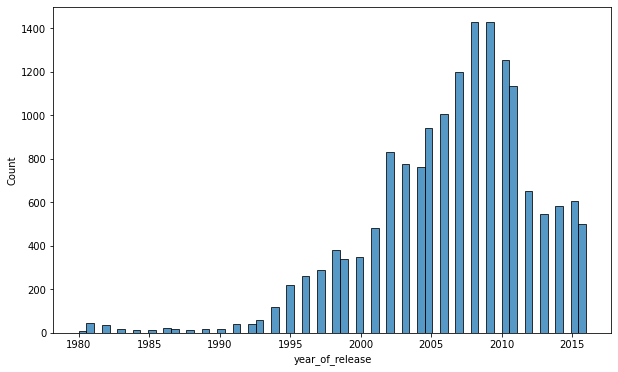

In [42]:
# Plot Histogram

plt.figure(figsize=(10, 6))
sns.histplot(x='year_of_release', data = df)

plt.show()

**Observation:**

The highest number of games release in a year is the year `2008` with 1427 games, follow by year `2009` with 1426 games. The total number of games relased exceed a 1000 is from year 2006 - 2011.

### Sales per Platform<a id='platform_sales'></a>

In [43]:
# Check total sales based on platform

platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales

,platform,total_sales
0,2600,86.48
1,3DO,0.10
2,3DS,257.81
3,DC,15.95
4,DS,802.78
5,GB,254.43
6,GBA,312.88
7,GC,196.73
8,GEN,28.35
9,GG,0.04


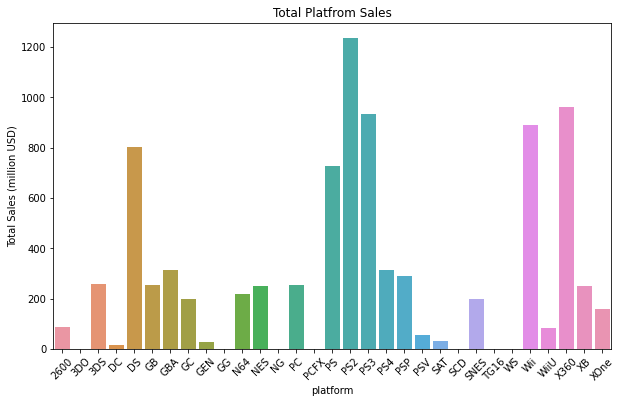

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_sales', data = platform_sales)

plt.xticks(rotation=45)
plt.title('Total Platfrom Sales')
plt.ylabel('Total Sales (million USD)')
plt.show()

**Observation:**

`PS2` has the greatest number of total sales with 1233.56 USD. 

In [45]:
# Create a dataset for PS2

columns = ['name', 'platform', 'year_of_release', 'genre', 'total_sales']
df_ps2 = df[df['platform'] == 'PS2'][columns]

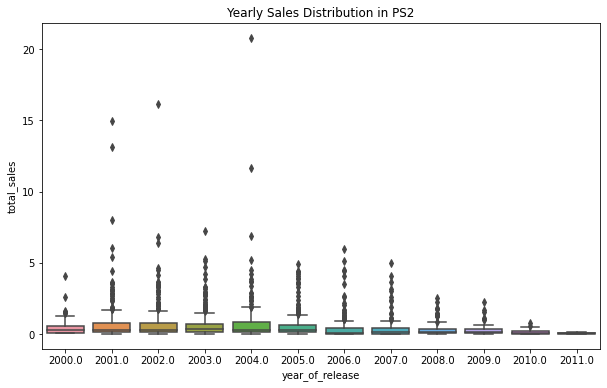

In [46]:
# Build a distribution based on data for each year

plt.figure(figsize=(10, 6))
sns.boxplot(x='year_of_release', y='total_sales', data = df_ps2)

plt.title('Yearly Sales Distribution in PS2')
plt.show()

**Observation:**

`PS2` started in year 2000 and became popular in 2001. After that the sales seems to be declining until 2011. 

**Question:**

Is the platform still in operation after 2011?

In [47]:
df.query('platform == "PS2" and year_of_release == 2012')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


**Answer:**

It seems that `PS2` does not have any game release starting year 2012.

### The Longevity of Platforms<a id='platform_long'></a>

Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? Determine what period you should take data for. The data should allow you to build a model for 2017.

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

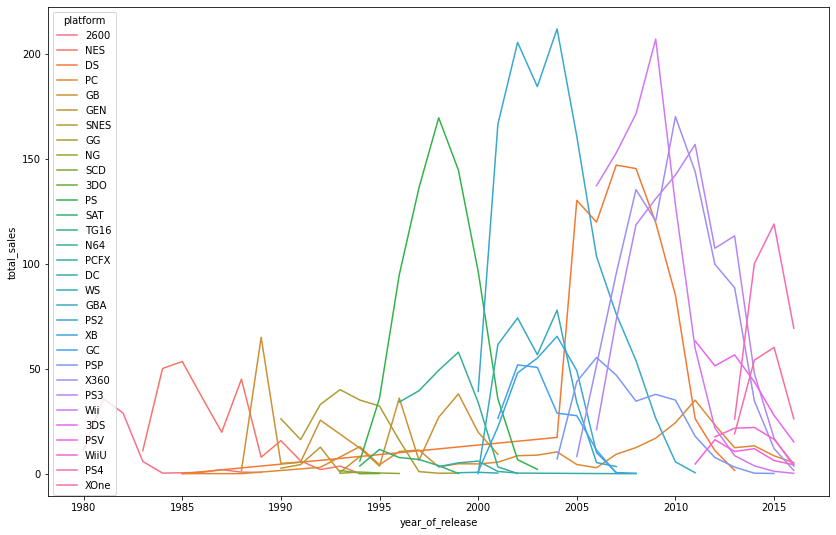

In [48]:
# Draw a line graph to observe the trend of the platform.

platform_year = df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
plt.figure(figsize=(14,9))
sns.lineplot(x='year_of_release', y='total_sales', data=platform_year, hue='platform')

In [49]:
# Calculate min & max of year_of_release

min_max_year = df.groupby('platform').agg({'year_of_release' : ['min','max']}).reset_index()
min_max_year.columns = ['platform','min_year','max_year']

# Create a column to calculate the duration of years

min_max_year['duration'] = min_max_year['max_year'] - min_max_year['min_year']
min_max_year

,platform,min_year,max_year,duration
0,2600,1980.0,1989.0,9.0
1,3DO,1994.0,1995.0,1.0
2,3DS,2011.0,2016.0,5.0
3,DC,1998.0,2008.0,10.0
4,DS,1985.0,2013.0,28.0
5,GB,1988.0,2001.0,13.0
6,GBA,2000.0,2007.0,7.0
7,GC,2001.0,2007.0,6.0
8,GEN,1990.0,1994.0,4.0
9,GG,1992.0,1992.0,0.0


In [50]:
# Calculate average year

min_max_year['duration'].mean()

7.612903225806452

**Observation:**

The lifecycle of the gaming platform generally took a duration of 7 - 8 years.

### Seperate the relevant `year_of_release`<a id='seperate'></a>

In [51]:
# Make a copy of original df
# Slice data that is 7 years back from 2017, should be games that is release after 2010

df_copy = df.copy()
df1 = df_copy[df_copy['year_of_release'] >= 2010]

In [52]:
df1['year_of_release'].value_counts()

2010.0    1255
2011.0    1136
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
Name: year_of_release, dtype: int64

### Data Analysis<a id='da'></a>

#### General Sales<a id='da1'></a>

1. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
2. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

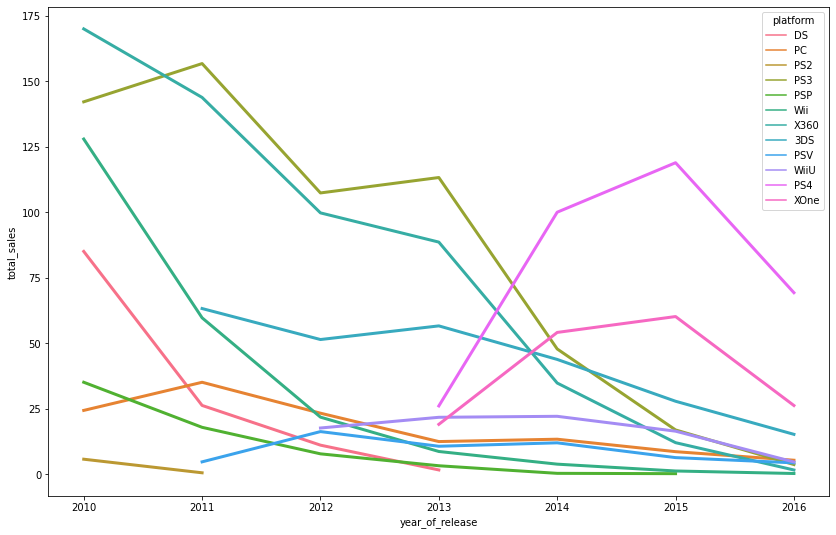

In [53]:
# Plot line graph for total sales each year

platform_sales = df1.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
plt.figure(figsize=(14,9))
sns.lineplot(x='year_of_release', y='total_sales', data=platform_sales, hue='platform', linewidth=3,)

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

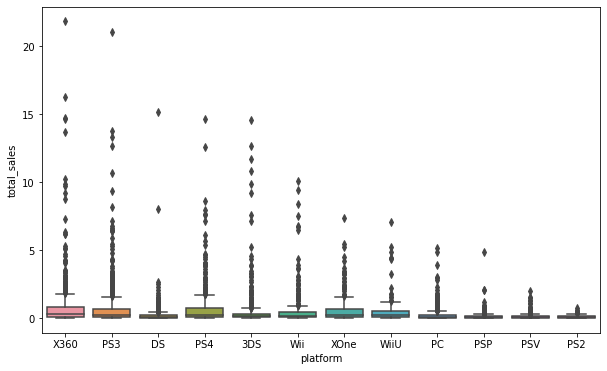

In [54]:
# Build a boxplot for global sales

plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='total_sales', data=df1)

<AxesSubplot:xlabel='platform', ylabel='avg_sales'>

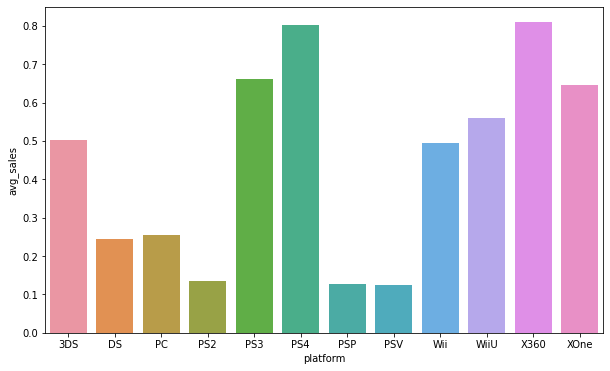

In [55]:
# Average sales of platform

avg_sales = df1.groupby('platform')['total_sales'].mean().reset_index()
avg_sales.rename(columns = {'total_sales': 'avg_sales'}, inplace = True)

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='avg_sales', data = avg_sales)

**Observation:**

**1. Line Graph:** The line graph shows a downward trend in general. However, since we discovered that platforms typically last around 7 years. In this line graph, there are 5 new platforms that emerge in 2011, 2012 and 2013. Among these platforms, `PS4` & `XOne` shows high potential in sales in 2015, two years after their release.

**2. Total sales boxplots:** The min value of `PS4` & `XOne` is higher than the rest of the platform's boxplot which starts around 25 million. This means that these 2 platform's minimum sales is at least 25 million USD while the rest of the platforms has a minumum sales close to 0 in the graph.

**3. Average sales barplot:** On average sales, `PS3`, `X360` and `PS4` have the highest average sales. Since `PS4` is a platform launched recently, having a high average sales just shows that this platform has high potential to bring in more sales.


#### User & Critic Reviews<a id='da2'></a>

1. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
2. Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [56]:
# Check correlation

columns = ['name', 'platform', 'year_of_release','total_sales', 'critic_score', 'user_score']
df_ps4 = df1[df1['platform'] == 'PS4'][columns]
df_ps4.corr()

,year_of_release,total_sales,critic_score,user_score
year_of_release,1.000000,-0.235032,-0.126706,-0.062157
total_sales,-0.235032,1.000000,0.227550,0.113116
critic_score,-0.126706,0.227550,1.000000,0.900850
user_score,-0.062157,0.113116,0.900850,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

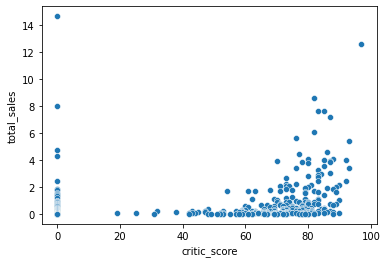

In [57]:
# Build scatterplot for critic_score

sns.scatterplot(x=df_ps4['critic_score'], y=df_ps4['total_sales'])

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

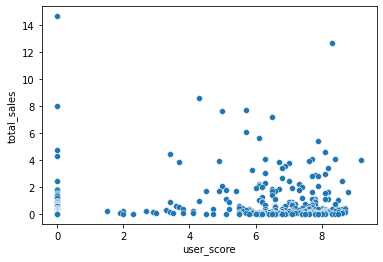

In [58]:
# Build scatterplot for user_score

sns.scatterplot(x=df_ps4['user_score'], y=df_ps4['total_sales'])

**Observation:**

There is a weak correlation between critic score and user score with total sales. This means that reviews doesn't affect the sales of the games very much.

In [59]:
# Picking a popular game in PS4

df_ps4

,name,platform,year_of_release,total_sales,critic_score,user_score
31,Call of Duty: Black Ops 3,PS4,2015.0,14.63,0.0,0.0
42,Grand Theft Auto V,PS4,2014.0,12.62,97.0,8.3
77,FIFA 16,PS4,2015.0,8.58,82.0,4.3
87,Star Wars Battlefront (2015),PS4,2015.0,7.98,0.0,0.0
92,Call of Duty: Advanced Warfare,PS4,2014.0,7.66,83.0,5.7
...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,0.01,69.0,7.5
16503,Shin Hayarigami 2,PS4,2016.0,0.01,0.0,0.0
16526,Dungeons 2,PS4,2016.0,0.01,61.0,7.9
16530,Carmageddon: Max Damage,PS4,2016.0,0.01,51.0,5.5


In [60]:
# Create a dataframe for the game in different platforms

columns = ['name', 'platform','year_of_release', 'total_sales', 'critic_score', 'user_score']
df_game = df1[df1['name'] == 'Call of Duty: Black Ops 3'][columns]
df_game

,name,platform,year_of_release,total_sales,critic_score,user_score
31,Call of Duty: Black Ops 3,PS4,2015.0,14.63,0.0,0.0
99,Call of Duty: Black Ops 3,XOne,2015.0,7.39,0.0,0.0
1049,Call of Duty: Black Ops 3,X360,2015.0,1.70,0.0,0.0
1062,Call of Duty: Black Ops 3,PS3,2015.0,1.69,0.0,0.0
6463,Call of Duty: Black Ops 3,PC,2015.0,0.26,0.0,0.0


**Observation:**

The game `Call of Duty: Black Ops 3` was the most popular game in PS4 and it did quite well in sales in XOne as well. The game was release in 2015 and it has no critic score or user score as well. Therefore, this confirms our findings that reviews does not impact game sales.

#### Genre<a id='da3'></a>

Take a look at the general distribution of games by genre. What is the most profitable genres? Generalize about genres with high and low sales.

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

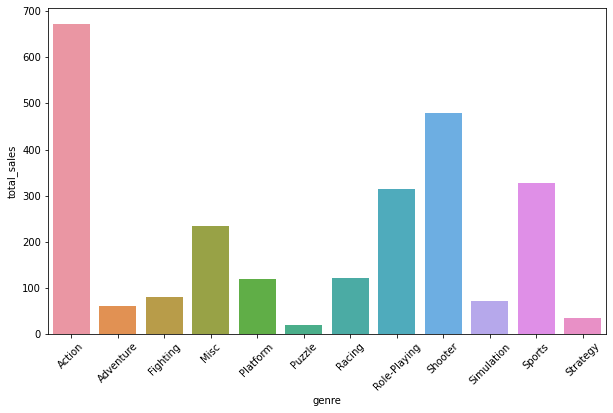

In [61]:
df_genre = df1.groupby('genre')['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='total_sales', data = df_genre)

**Observation:**

Genre with **high sales** - `Action` , `Shooter`and `Sports`

Genre with **low sales** - `Puzzle`, `Strategy` and `Adventure`

### Data Analysis by Region<a id='da_r'></a>

For each region (NA, EU, JP), determine:

1. The top five platforms. Describe variations in their market shares from region to region.
2. The top five genres. Explain the difference.
3. Do ESRB ratings affect sales in individual regions?

#### NA<a id='na'></a>

<AxesSubplot:xlabel='platform', ylabel='na_sales'>

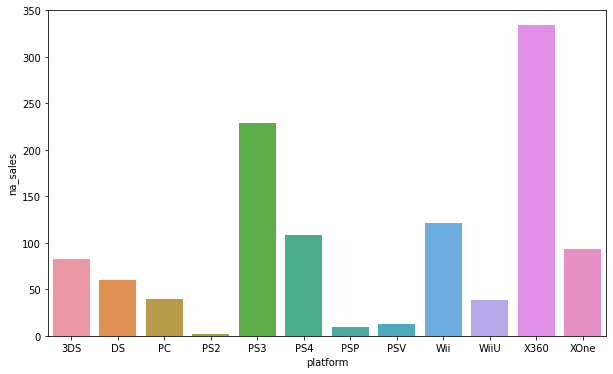

In [62]:
# Plot barplot and observe top 5 platforms for NA region

df_na = df1.groupby('platform')['na_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='na_sales', data = df_na)

<AxesSubplot:xlabel='genre', ylabel='na_sales'>

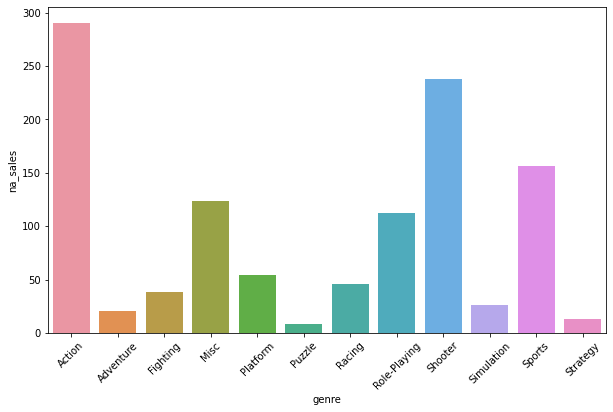

In [63]:
# Plot barplot for top 5 genre for NA region

na_genre = df1.groupby('genre')['na_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='na_sales', data = na_genre)

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

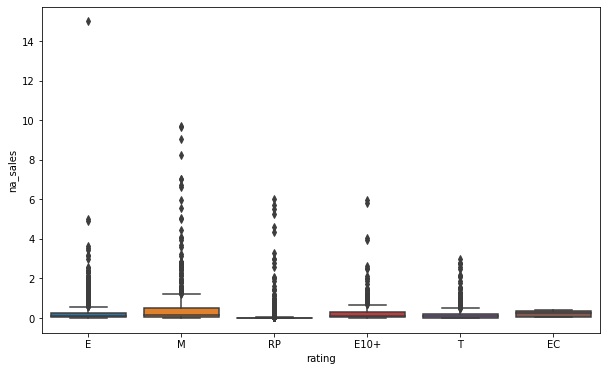

In [64]:
# ESRB Ratings vs NA Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y= 'na_sales', data = df1)

#### EU<a id='eu'></a>

<AxesSubplot:xlabel='platform', ylabel='eu_sales'>

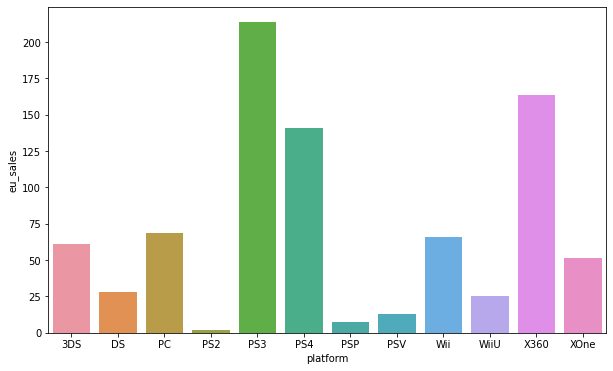

In [65]:
# Plot barplot and observe top 5 platforms for EU region

df_eu = df1.groupby('platform')['eu_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='eu_sales', data = df_eu)

<AxesSubplot:xlabel='genre', ylabel='eu_sales'>

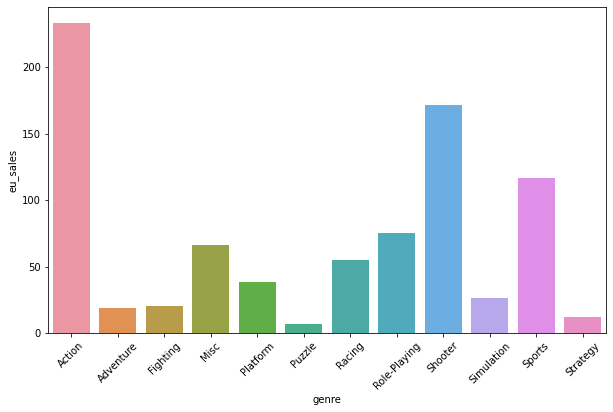

In [66]:
# Plot barplot for top 5 genre for EU region

eu_genre = df1.groupby('genre')['eu_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='eu_sales', data = eu_genre)

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

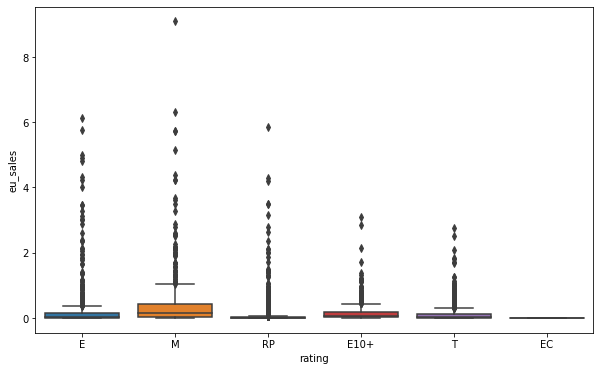

In [67]:
# ESRB Ratings vs EU Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y= 'eu_sales', data = df1)

#### JP<a id='jp'></a>

<AxesSubplot:xlabel='platform', ylabel='jp_sales'>

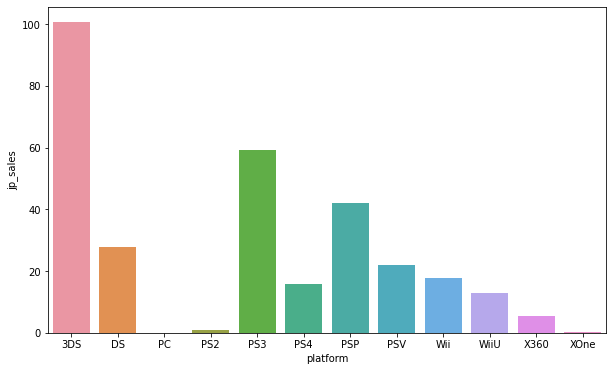

In [68]:
# Plot barplot and observe top 5 platforms for JP region

df_jp = df1.groupby('platform')['jp_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='jp_sales', data = df_jp)

<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

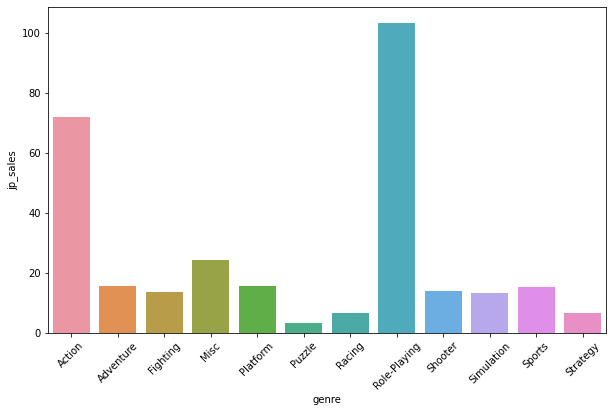

In [69]:
# Plot barplot for top 5 genre for EU region

jp_genre = df1.groupby('genre')['jp_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x='genre', y='jp_sales', data = jp_genre)

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

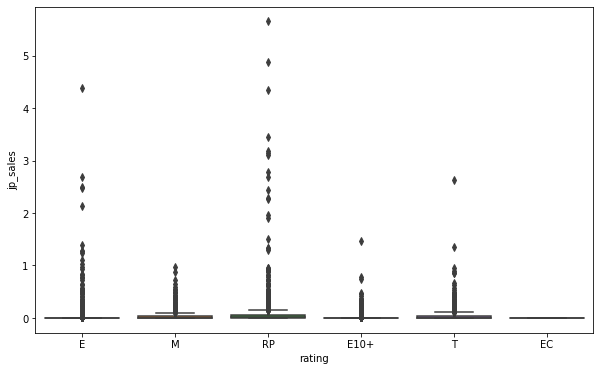

In [70]:
# ESRB Ratings vs JP Sales

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y= 'jp_sales', data = df1)

**Observation:**

**NA**

Top 5 Platforms - 1)`X360`, 2)`PS3`, 3)`Wii`, 4)`PS4`, 5)`XOne`

Top 5 Genre - 1) Action, 2) Shooter, 3) Sports, 4) Misc, 5) Role-playing

Ratings : The NA has more sales in M rating games. However, there is also a high selling game at E rating as well.

**EU**

Top 5 Platforms - 1)`PS3`, 2)`X360`, 3)`PS4`, 4)`PC`, 5)`Wii`

Top 5 Genre - 1) Action, 2) Shooter, 3) Sports, 4) Role-playing, 5) Misc

Ratings : The EU has more sales in M rating games.

**JP**

Top 5 Platforms - 1)`3DS`, 2)`PS3`, 3)`PSP`, 4)`DS`, 5)`PSV`

Top 5 Genre - 1) Role-playing , 2) Action, 3) Misc , 4) Platform, 5) Sports

Ratings : The JP has more sales in RP rating games, games that are pending in their ratings.

**Conclusion:**

For **top 5 platforms**, `PS3` seems to be the most sellable platform as it appears in Top 1 or Top 2 for all 3 regions. The NA and EU have similar popular platforms, the only difference is that the NA perfers the `XOne` platform, a new platform while the EU prefers `PC` platform, an older platform for games. For JP region, it is totally different except `PS3` platform. It seems that the new platforms like `PS4` and `XOne` has not gain popularity in JP region yet. 

For **genre**, Action genre ranked highest, especially in Top 1 or Top 2 for all 3 regions. NA and EU region have similar genre preferrences. For JP region, Role-Playing is their Top 1 genre in games, different from the other 2 regions.

For **ratings**, NA and EU prefers games with M rating as the data shows more sales for games in this rating. However, JP region has higher sales in RP rating games. 

On a side note, based on the Ratings boxplot for all region, JP region has the most sales record with 0 value as the boxplot's body appears very slim, like a single line on the value 0 at y-axis.


## Stage 4. Hypotheses testing<a id='hypo'></a>

### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.<a id='hypo1'></a> 

Null Hypothesis : Average user ratings of the Xbox One and PC platforms are the same. 

Alternative Hypothesis : Average user ratings of the Xbox One and PC platforms are different. 

In [75]:
# Calculate the average user ratings for both platforms

df_rating = df1.groupby(['platform', 'year_of_release'])['user_score'].agg('mean').reset_index()
xone_rating = df_rating[df_rating['platform'] == 'XOne']
pc_rating = df_rating[df_rating['platform'] == 'PC']

In [82]:
# Test Hypothesis

alpha = 0.05

results = st.ttest_ind(xone_rating['user_score'] ,pc_rating['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.19723620959754384
We can't reject the null hypothesis


### Hypothesis 2: Average user ratings for the Action and Sports genres are different.<a id='hypo2'></a>

Null Hypothesis : Average user ratings for the Action and Sports genres are different.

Alternative Hypothesis : Average user ratings for the Action and Sports genres are the same.

In [80]:
# Calculate the average user ratings for the Action and Sports genres

df_rating1 = df1.groupby(['genre', 'year_of_release'])['user_score'].agg('mean').reset_index()
action_rating = df_rating1[df_rating1['genre'] == 'Action']
sport_rating = df_rating1[df_rating1['genre'] == 'Sports']

In [81]:
# Test Hypothesis

alpha = 0.05

results = st.ttest_ind(action_rating['user_score'] ,sport_rating['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.9919588224591769
We can't reject the null hypothesis


# Conclusion<a id='end'></a>

In general, we found out that a game platform lasted for an average of 7 years. Out of all the game platforms, `PS4` and `XOne` platform seems to have more potential because:
1. It generates high income
2. The platform is currently running for only 3 years.

In terms of genre, `Action` , `Shooter` and `Sports` is most popular and has high sales. However, each region has their own preferred platform and genre.

When testing hypothesis, the p-results shows the posibility that the average user ratings of the `Xbox One` and `PC` platforms are the same and the average user ratings for the `Action` and `Sports` genres are different.